# Arcelor-Mittal Takeover Case

In [2]:
import pandas as pd
import xlrd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import statistics
import seaborn as sns

In [5]:
import tabula

In [22]:
import warnings
warnings.filterwarnings("ignore")

# Q1
What  is  the  market’s  estimate  of  the  synergy  in  the  merger? Use  different  assumptions  about  the  measurement  horizon.  Note that before the first acquisition attempt there were 640 million  shares  of  Arcelor  and  704  million  shares  of  Mittal outstanding.

In [69]:
shs_arc = 640
shs_mit = 704

In [19]:
# tabula.read_pdf("S9.1_ACF_Arcelor_Mittal_Takeover.pdf", pages=11, pandas_options={"header":None})[0]

In [20]:
# tabula.read_pdf("S9.1_ACF_Arcelor_Mittal_Takeover.pdf", pages=12, pandas_options={"header":None})[0]

In [21]:
# tabula.read_pdf("S9.1_ACF_Arcelor_Mittal_Takeover.pdf", pages=13, pandas_options={"header":None})[0]

In [36]:
pg1 = tabula.read_pdf("S9.1_ACF_Arcelor_Mittal_Takeover.pdf", pages=11, pandas_options={"header":None})[0]
pg1.drop(index=0, inplace=True)

pg2 = tabula.read_pdf("S9.1_ACF_Arcelor_Mittal_Takeover.pdf", pages=12, pandas_options={"header":None})[0]

pg3 = tabula.read_pdf("S9.1_ACF_Arcelor_Mittal_Takeover.pdf", pages=13, pandas_options={"header":None})[0]
pg3.drop(index=0, inplace=True)

In [28]:
stock_returns = pd.concat([pg1, pg2, pg3], ignore_index=True)

In [30]:
stock_returns.columns = ["Date", "Arcelor_Share_Price", "Arcelor_Excess_Return", "Arcelor_Cummulative_Excess_Return", 
                         "Mittal_Share_Price", "Mittal_Excess_Return", "Mittal_Cummulative_Excess_Return"
                        ]

In [35]:
stock_returns

,Date,Arcelor_Share_Price,Arcelor_Excess_Return,Arcelor_Cummulative_Excess_Return,Mittal_Share_Price,Mittal_Excess_Return,Mittal_Cummulative_Excess_Return
0,02-Jan-06,2 1.14,1%,1%,2 3.27,4%,4%
1,03-Jan-06,2 1.27,-2%,-1%,2 2.50,-6%,-2%
2,04-Jan-06,2 1.94,2%,1%,2 2.52,-1%,-3%
3,05-Jan-06,2 1.90,0%,1%,2 2.23,-1%,-4%
4,06-Jan-06,2 1.89,-1%,-1%,2 2.40,0%,-5%
...,...,...,...,...,...,...,...
147,26-Jul-06,4 3.00,8%,50%,2 6.50,3%,-12%
148,27-Jul-06,4 2.40,-1%,49%,2 6.40,0%,-12%
149,28-Jul-06,4 1.64,-4%,45%,2 6.25,-2%,-14%
150,31-Jul-06,4 1.75,0%,45%,2 6.60,1%,-13%


In [37]:
stock_returns.to_csv("stock_returns_arcelor_mittal_Jan2006_Aug2006.csv", index=False)

In [44]:
stock_returns = pd.read_excel("parsed_arcelor_mittal_stock_returns_Jan2006_Aug2006.xlsx")

In [86]:
stock_returns.head()

,Date,Arcelor_Share_Price,Mittal_Share_Price,Arcelor_Excess_Return,Arcelor_Cummulative_Excess_Return,Mittal_Excess_Return,Mittal_Cummulative_Excess_Return
0,2006-01-02,21.14,23.27,0.01,0.01,0.04,0.04
1,2006-01-03,21.27,22.50,-0.02,-0.01,-0.06,-0.02
2,2006-01-04,21.94,22.52,0.02,0.01,-0.01,-0.03
3,2006-01-05,21.90,22.23,0.00,0.01,-0.01,-0.04
4,2006-01-06,21.89,22.40,-0.01,-0.01,0.00,-0.05


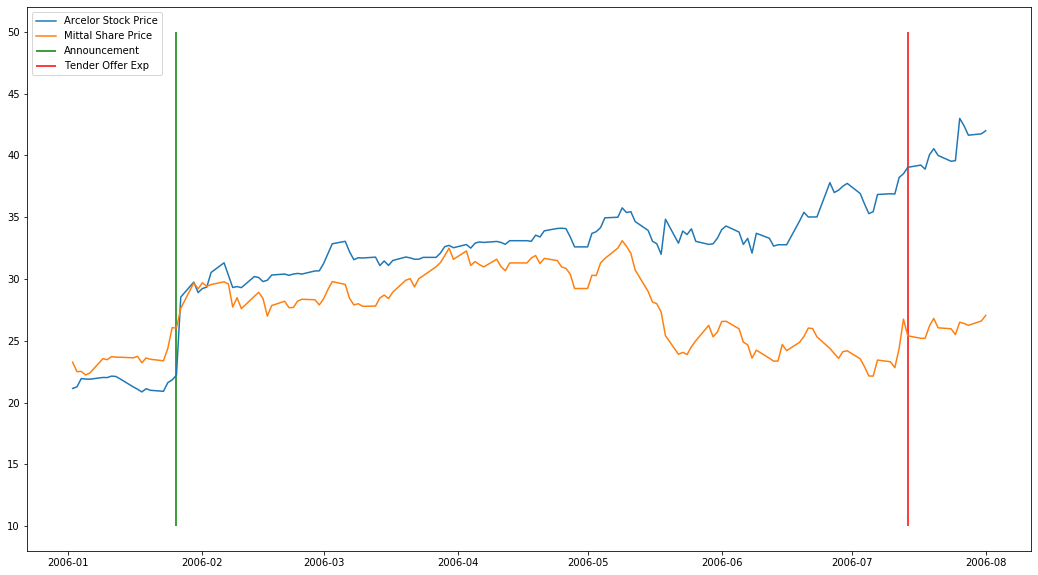

In [141]:
plt.figure(figsize=(18,10))
plt.plot(stock_returns.Date, stock_returns.Arcelor_Share_Price, label="Arcelor Stock Price", scaley=False)
plt.plot(stock_returns.Date, stock_returns.Mittal_Share_Price, label="Mittal Share Price")
plt.vlines(x='2006-01-26', ymin=10, ymax=50, label="Announcement", color="green")
plt.vlines(x='2006-07-14', ymin=10, ymax=50, label="Tender Offer Exp", color="red")
plt.legend(loc="upper left")

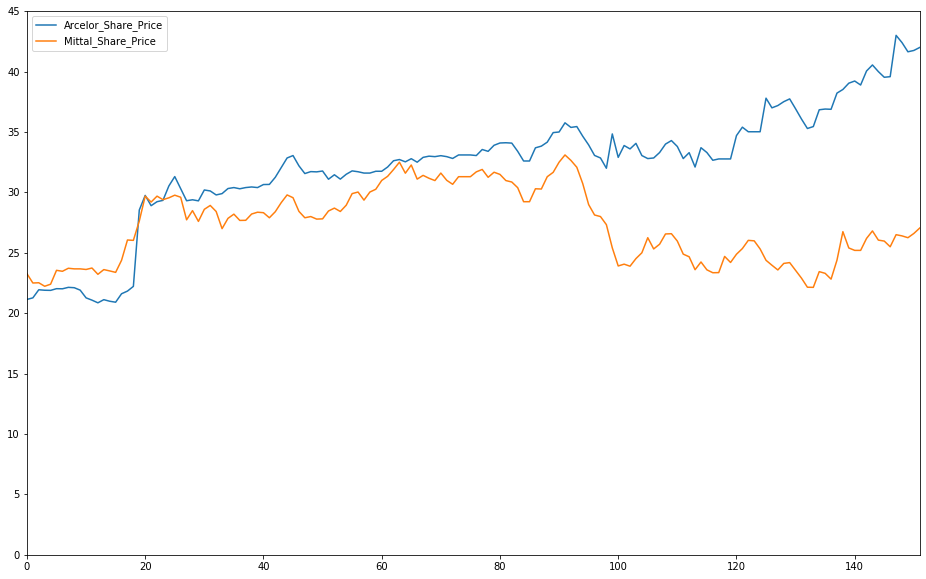

In [53]:

stock_returns[["Arcelor_Share_Price", "Mittal_Share_Price"]].plot(figsize=(16,10), ylim=(0,45))

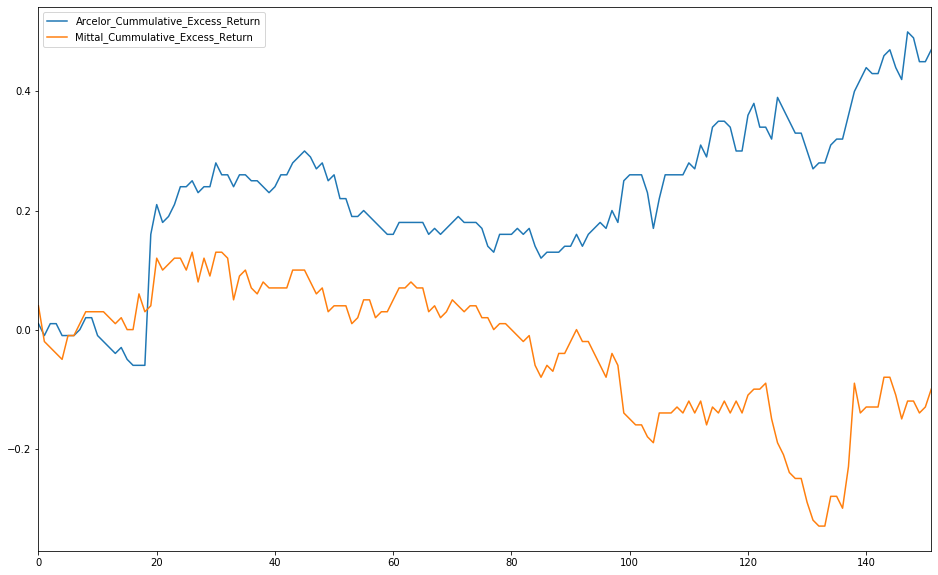

In [78]:
stock_returns[["Arcelor_Cummulative_Excess_Return", "Mittal_Cummulative_Excess_Return"]].plot(figsize=(16,10))

In [87]:
stock_returns.loc[stock_returns.Date == '2006-07-14']

,Date,Arcelor_Share_Price,Mittal_Share_Price,Arcelor_Excess_Return,Arcelor_Cummulative_Excess_Return,Mittal_Excess_Return,Mittal_Cummulative_Excess_Return
139,2006-07-14,39.04,25.4,0.01,0.42,-0.05,-0.14


In [88]:
mit_gain = 23.27 * shs_mit * stock_returns.Mittal_Cummulative_Excess_Return[139]

In [89]:
arc_gain = 21.14 * shs_arc * (1+stock_returns.Arcelor_Cummulative_Excess_Return[139])

In [90]:
arc_gain, mit_gain

(19212.032, -2293.4912000000004)

In [91]:
arc_gain + mit_gain

16918.5408

In [100]:
# Announcement bid came on Jan 27 to Jan 28

In [114]:
stock_returns.iloc[:22]

,Date,Arcelor_Share_Price,Mittal_Share_Price,Arcelor_Excess_Return,Arcelor_Cummulative_Excess_Return,Mittal_Excess_Return,Mittal_Cummulative_Excess_Return
0,2006-01-02,21.14,23.27,0.01,0.01,0.04,0.04
1,2006-01-03,21.27,22.50,-0.02,-0.01,-0.06,-0.02
2,2006-01-04,21.94,22.52,0.02,0.01,-0.01,-0.03
3,2006-01-05,21.90,22.23,0.00,0.01,-0.01,-0.04
4,2006-01-06,21.89,22.40,-0.01,-0.01,0.00,-0.05
5,2006-01-09,22.03,23.55,0.00,-0.01,0.04,-0.01
6,2006-01-10,22.02,23.47,0.00,-0.01,0.00,-0.01
7,2006-01-11,22.14,23.72,0.01,0.00,0.02,0.01
8,2006-01-12,22.11,23.67,0.02,0.02,0.02,0.03
9,2006-01-13,21.91,23.67,0.00,0.02,0.01,0.03


In [115]:
# using the pre and post announcement gains

(29.75-21.14) * shs_arc

5510.4

In [116]:
(29.69 - 23.27) * shs_mit

4519.680000000001

In [117]:
5510.4 + 4519.68

10030.08

In [118]:
# adjust based on FP of 26
(29.75-26) * shs_arc, (29.69 - 23.27) * shs_mit

(2400.0, 4519.680000000001)

In [119]:
2400 + 4519.68

6919.68

# Q2

What is the management’s estimate of the synergy? You can use the Arcelor-Mittal valuation spreadsheet on the course website or calculate it manually 


In [96]:
mgmt_val = pd.read_clipboard()

In [98]:
mgmt_val.fillna(0)

,DIM,2004,2005,2006,2007,2008,2009,CV
0,Discount Factor,0.0,0.0,1.000000,0.923088,0.852092,0.786556,0.790000
1,PV(FCF),0.0,0.0,2118.439185,3893.833126,3608.278633,3851.207259,0.000000
2,Total PV(FCF),0.0,0.0,13471.758203,0.000000,0.000000,0.000000,0.000000
3,Continuation Value (CV),0.0,0.0,0.000000,0.000000,0.000000,0.000000,48489.691159
4,PV(CV),0.0,0.0,38306.856015,0.000000,0.000000,0.000000,0.000000
5,Enterprise Value {=Total PV(FCF) + PV(CV)},0.0,0.0,51778.614219,0.000000,0.000000,0.000000,0.000000
6,- Financial Debt,0.0,0.0,18200.000000,0.000000,0.000000,0.000000,0.000000
7,- Minority Interest,0.0,0.0,4334.000000,0.000000,0.000000,0.000000,0.000000
8,+ Affiliates,0.0,0.0,2434.000000,0.000000,0.000000,0.000000,0.000000
9,- Pension Obligations,0.0,0.0,2889.000000,0.000000,0.000000,0.000000,0.000000


		2004	2005	2006	2007	2008	2009	CV
								
Discount Factor				 1.00 	 0.92 	 0.85 	 0.79 	 0.79 
PV(FCF)				 2,118 	 3,894 	 3,608 	 3,851 	
Total PV(FCF)				 13,472 				
Continuation Value (CV)								 48,490 
PV(CV) 				 38,307 				
Enterprise Value {=Total PV(FCF) + PV(CV)}				 51,779 				
 - Financial Debt				 18,200 				
 - Minority Interest				 4,334 				
 + Affiliates				 2,434 				
 - Pension Obligations				 2,889 				
TOTAL EQUITY VALUE 				 28,790 				
Estimated Shares Outstanding (millions)				 1,417 				
Equity Value (EUR per Share)				 20.32 				
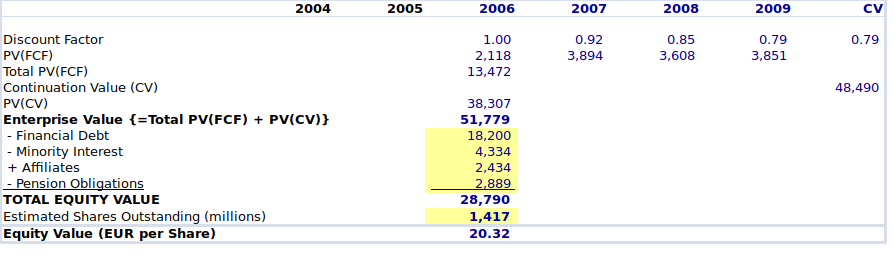

In [99]:
shs_arc + shs_mit

1344

In [120]:
21.14 * shs_arc + 23.27 * shs_mit

29911.68

In [121]:
# mgmt 
# year 1 = 0.5 B
# year 2 = 0.9 B
# year 3 on wards = 1.3 B

In [122]:
wacc = 0.08

In [123]:
sum([1.3/1.08**x for x in range(4,100)])

12.891795778064116

In [124]:
0.5 + 0.9/1.08**2 + 12.89

14.161604938271605

# Q3
Given this information what should the be the maximum price Mittal can pay per share of Arcelor without destroying shareholder value?

In [152]:
14161.6/640

22.1275

In [144]:
14.1616/2

7.0808

In [145]:
7081/640

11.0640625

In [147]:
# Arcelor stock price before announcement 
22.22

22.22

In [148]:
22.22 + 11.064

33.284

In [153]:
22.22 + 22.1275

44.3475

# Q4
How does the market react to the various takeover defences employed by Arcelor? Calculate the abnormal returns starting one day before the announcement day until one day after around every major anti-takeover defence announcement. Which of the defensive tactics can be considered as a way to obtain a higher bid, rather than preserve independence at any cost? Use Arcelor Exhibit B that is posted on the website 

# Q5

Why does a repurchase tender offer not increase stock prices, in contrast to the typical case?

Total wealth created for all shareholders is best measured by the total _abnormal_ return $Total_R$

$$
  Total_R = F_p * repurchasePremium + (1-F_p)*CAR
$$

Tender offers which predicted that the total abnormal return to all shareholders could be predicted by the following regression:

$$
  Total_R = 0.6*Premium + 0.25*PercOfSharesRepurchased
$$

In [154]:
# stock before announcement was 22.22
(40 - 22.22) / 22.22

0.8001800180018003

In [161]:
shs_arc / (shs_arc + shs_mit)

0.47619047619047616

In [162]:
r_premium = 0.8001800180018003
0.6 * r_premium + 0.25 * .4762

0.5991580108010801

In [163]:
22.22 * 1.5991580108010801

35.533291

# Q6

Evaluate Mittal’s financing strategy of the bid using the post-acquisition capital structure information.